In [19]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=1.4)
sns.set_style("whitegrid")

import warnings
warnings.filterwarnings('ignore')

# read in saved results 
n, p = 2000, 500
# dfs[0] and dfs[1] are ridge and lasso results
# regs = ['ridge', 'lasso']
regs = ['ridge', 'ElasticNet', 'lasso']

dfs = [pd.read_pickle('df_' + reg + f'_n{n}_p{p}.pkl', compression='gzip') for reg in regs]

['M', '1', '3', '5', 'Type', 'Risk', 'CGCV', 'GCV']


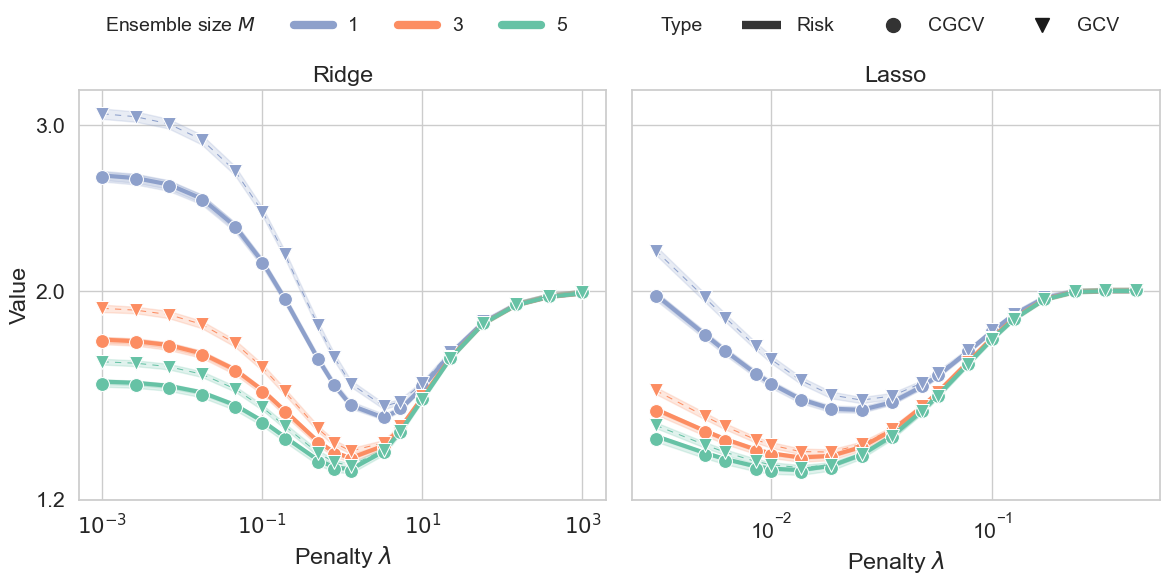

In [20]:
sns.set(font_scale=1.4)
sns.set_style("whitegrid")
fig, axes = plt.subplots(1,2, figsize=(12,6), sharey=True)
cm = sns.color_palette('magma_r', 3)

M_list = np.array([1,3,5], dtype=str)

for j, method in enumerate(['ridge', 'lasso']):
    if j ==0:
        df = dfs[0]
    if j ==1:
        df = dfs[2]
    # df = dfs[j]
    df_emp = df[(df.Type.isin(['Risk', 'GCV', 'CGCV']))
         & (df.M.isin([1,3,5]))
         & (df.k==p+300) # change k to get different plots
        ]
    df_emp['M'] = df_emp['M'].astype(str)

#     axes[j].vlines(phi, y_min-1, y_max+1,
#               linestyles='--', color='gray')
#     axes[j].text(phi*1.1, y_text[j],'Data aspect ratio $\phi={:.01f}$'.format(phi), color='gray', fontsize=16)
    sns.lineplot(
        data=df_emp[(df_emp['lam'].isin(df_emp['lam'].unique()[::2]))], 
        x='lam', y='risk', palette=sns.color_palette("Set2", len(M_list))[::-1], #errorbar=None,
         hue='M', hue_order=M_list, 
        style='Type', style_order=['Risk', 'CGCV', 'GCV', ], dashes=[(1,0),(0,1),(6,6)],
        markers=['.', 'o', 'v'], markersize=10, 
        size='Type', size_order=['Risk', 'CGCV', 'GCV'],
        ax=axes[j], 
    )
    
    
    axes[j].set_xscale('log')
    axes[j].set_yscale('log')
    axes[j].set_title(method)

    axes[j].set_xlabel('Penalty $\lambda$')
    if j==0:
        axes[j].set_ylabel('Value')
    else:
        axes[j].set_ylabel('')

for j in range(1):
    
    axes[j].set_xticks([])
    axes[j].set_xticks([], minor=True)
    exponents = np.array([-3,-1,1,3]) if j==0 else np.arange(-2,1,1)
    ticks = 10.**exponents
    axes[j].set_xticks(ticks)
    axes[j].set_xticklabels(['$10^{{{:d}}}$'.format(i) for i in exponents])
    
j = 0
axes[j].set_yticks([])
axes[j].set_yticks([], minor=True)
ticks = [1.2, 2., 3.]
axes[j].set_yticks(ticks)
axes[j].set_yticklabels(['{:.01f}'.format(i) for i in ticks])

axes[0].set_title('Ridge')
axes[1].set_title('Lasso')


lines_labels = [ax.get_legend_handles_labels() for ax in [axes[0]]]
handles, labels = [sum(lol, []) for lol in zip(*lines_labels)]
_, indices = np.unique(labels, return_index=True)
print(labels)
for j in range(2):
    axes[j].get_legend().remove()
labels[0] = 'Ensemble size $M$'
labels[4:] = ['Type', 'Risk', 'CGCV', 'GCV']
import matplotlib
import matplotlib.lines as mlines
handles[-1] = mlines.Line2D([], [], color='k', marker='v', linestyle='None',
                          markersize=10)
legend = fig.legend(handles=handles, labels=labels,
                    loc=9, ncol=10, title='', frameon=False, fontsize=14)

def legend_title_left(leg):
    c = leg.get_children()[0]
    title = c.get_children()[0]
    hpack = c.get_children()[1]
    c._children = [hpack]
    hpack._children = [title] + hpack.get_children()
legend_title_left(legend)

for item, label in zip(legend.legendHandles, legend.texts):
    if label.get_text()=='Risk':
        item.set_linewidth(6)
    elif label.get_text()=='CGCV' or label.get_text()=='GCV':
        item.set_linewidth(2)
        item.set_markersize(10)
    else:
        item.set_linewidth(6)
        
    label.set_ha('left')
fig.tight_layout()
fig.subplots_adjust(top=0.85)
plt.savefig('Fig1_ridge_lasso.pdf', bbox_inches='tight', dpi=300)

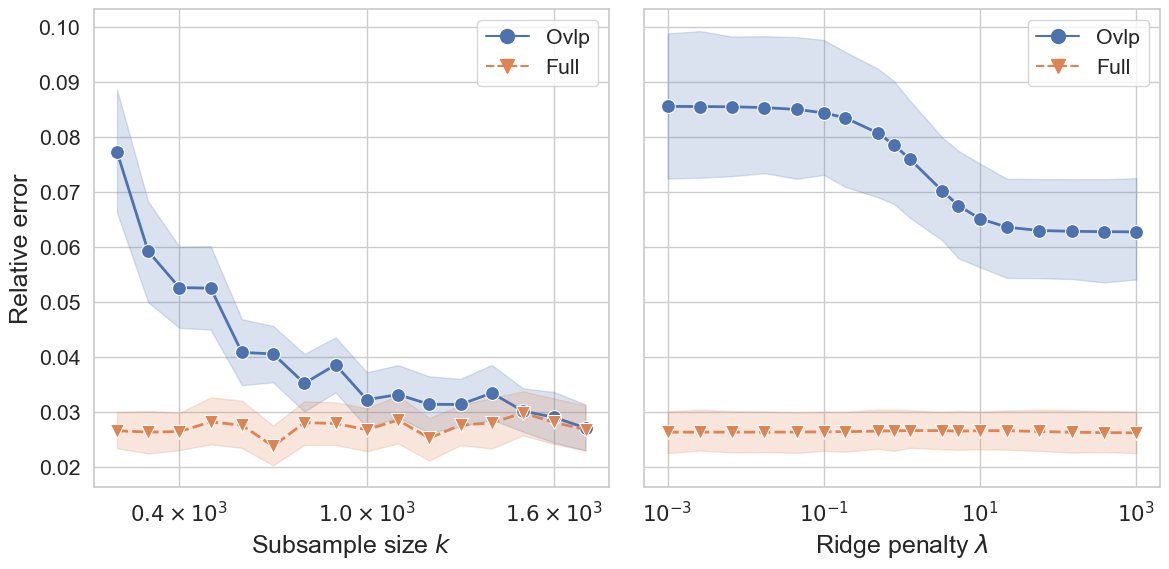

In [21]:
fig, axs = plt.subplots(1,2, figsize=(12, 6), sharey=True)
lams = [1, .01]

df = dfs[0]    
i = 0

df1 = df[(df.Type.isin(['sub_error', 'full_error']))
     & (df.M.isin([10]))
     & (df.lam == lams[0]) # k is small, less than p
    ]

di = {'sub_error': 'Ovlp', 'full_error': 'Full'}
df1 = df1.replace({'Type': di})

g = sns.lineplot(
    data=df1, x='k', y='risk', hue='Type', hue_order=['Ovlp', 'Full'],
    style="Type", linewidth=2, #errorbar=None, 
    style_order=['Ovlp', 'Full'], 
    markers=['o', 'v'], markersize=10, ax=axs[i]
)
g.legend_.set_title(None)

axs[i].set_xlabel('Subsample size $k$', fontsize=18)
axs[i].set_ylabel("Relative error", fontsize=18)
# axs[i].title.set_text(regs[i].capitalize())
axs[i].set_xticks([])
axs[i].set_xticks([], minor=True)
base = np.array([0.4, 1, 1.6])
ticks = base * 10.**3
axs[i].set_xticks(ticks)
axs[i].set_xticklabels([r'${:.01f}\times10^3$'.format(i) for i in base])

i = 1
df1 = df[(df.Type.isin(['sub_error', 'full_error']))
     & (df.M.isin([10]))
     & (df.k.isin([df.k.min()])) # k is small, less than p
    ]

di = {'sub_error': 'Ovlp', 'full_error': 'Full'}
df1 = df1.replace({'Type': di})

g = sns.lineplot(
    data=df1[df1['lam'].isin(df1['lam'].unique()[::2])], x='lam', y='risk', hue='Type', hue_order=['Ovlp', 'Full'],
    style="Type", linewidth=2, #errorbar=None, 
    style_order=['Ovlp', 'Full'], 
    markers=['o', 'v'], markersize=10, ax=axs[i]
)
g.legend_.set_title(None)


axs[1].set_xscale("log")
axs[i].set_xlabel('Ridge penalty $\lambda$', fontsize=18)
axs[i].set_ylabel("Relative error", fontsize=18)
# axs[i].title.set_text(regs[0].capitalize())
axs[i].set_xticks([])
axs[i].set_xticks([], minor=True)
exponents = np.array([-3,-1,1,3])
ticks = 10.**exponents
axs[i].set_xticks(ticks)
axs[i].set_xticklabels(['$10^{{{:d}}}$'.format(i) for i in exponents])

axs[1].set(ylabel=None)
for j in range(2):
    for lh in axs[j].get_legend().legendHandles:
        lh.set_markersize(10)

fig.tight_layout()
plt.savefig('Fig2_sub_full_ridge.pdf', bbox_inches='tight', dpi=300)

In [22]:
dfs[1].lam.unique()

array([0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01 ,
       0.011, 0.013, 0.015, 0.017, 0.02 , 0.024, 0.028, 0.032, 0.037,
       0.044, 0.051, 0.059, 0.069, 0.081, 0.094, 0.11 , 0.129, 0.15 ,
       0.175])

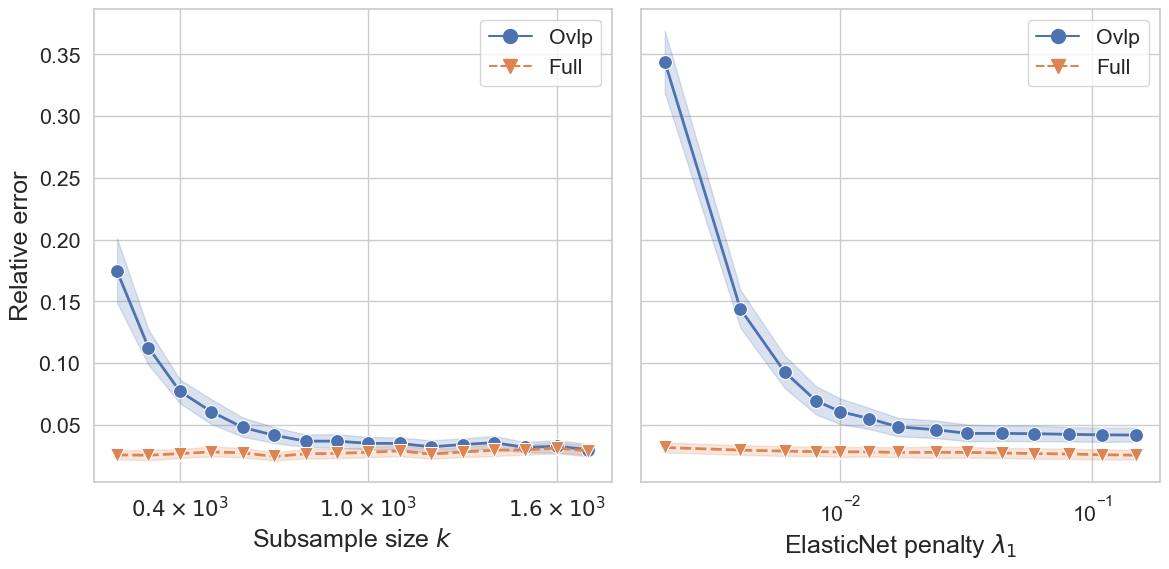

In [23]:
fig, axs = plt.subplots(1,2, figsize=(12, 6), sharey=True)
lams = [1, .01]

df = dfs[1]    
i = 0
df1 = df[(df.Type.isin(['sub_error', 'full_error']))
     & (df.M.isin([10]))
     & (df.lam == lams[1]) # k is small, less than p
    ]

di = {'sub_error': 'Ovlp', 'full_error': 'Full'}
df1 = df1.replace({'Type': di})

g = sns.lineplot(
    data=df1, x='k', y='risk', hue='Type', hue_order=['Ovlp', 'Full'],
    style="Type", linewidth=2, #errorbar=None, 
    style_order=['Ovlp', 'Full'], 
    markers=['o', 'v'], markersize=10, ax=axs[i]
)

# g.set(xscale="log")
g.legend_.set_title(None)
axs[i].set_xlabel('Subsample size $k$', fontsize=18)
axs[i].set_ylabel("Relative error", fontsize=18)
# axs[i].title.set_text(regs[i].capitalize())
axs[i].set_xticks([])
axs[i].set_xticks([], minor=True)
base = np.array([0.4, 1, 1.6])
ticks = base * 10.**3
axs[i].set_xticks(ticks)
axs[i].set_xticklabels([r'${:.01f}\times10^3$'.format(i) for i in base])

i = 1
df1 = df[(df.Type.isin(['sub_error', 'full_error']))
     & (df.M.isin([10]))
     & (df.k.isin([df.k.min()+300])) # k is small, less than p
    ]

di = {'sub_error': 'Ovlp', 'full_error': 'Full'}
df1 = df1.replace({'Type': di})

g = sns.lineplot(
    data=df1[df1['lam'].isin(df1['lam'].unique()[::2])], x='lam', y='risk', hue='Type', hue_order=['Ovlp', 'Full'],
    style="Type", linewidth=2, #errorbar=None, 
    style_order=['Ovlp', 'Full'], 
    markers=['o', 'v'], markersize=10, ax=axs[i]
)

g.set(xscale="log")
g.legend_.set_title(None)
axs[i].set_xlabel('ElasticNet penalty $\lambda_1$', fontsize=18)
axs[i].set_ylabel("Relative error", fontsize=18)
# axs[i].title.set_text(regs[1].capitalize())


axs[1].set(ylabel=None)
for j in range(2):
    for lh in axs[j].get_legend().legendHandles:
        lh.set_markersize(10)

fig.tight_layout()
plt.savefig('Fig2_sub_full_ElasticNet.pdf', bbox_inches='tight', dpi=300)

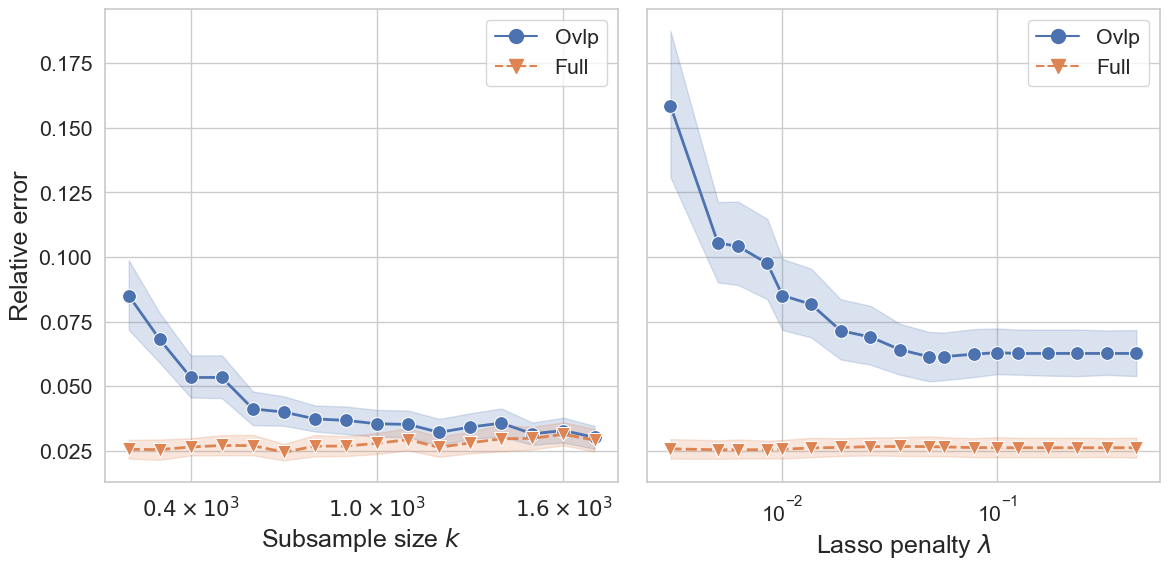

In [24]:
fig, axs = plt.subplots(1,2, figsize=(12, 6), sharey=True)
lams = [1, .01]

df = dfs[2]    
i = 0
df1 = df[(df.Type.isin(['sub_error', 'full_error']))
     & (df.M.isin([10]))
     & (df.lam == lams[1]) # k is small, less than p
    ]

di = {'sub_error': 'Ovlp', 'full_error': 'Full'}
df1 = df1.replace({'Type': di})

g = sns.lineplot(
    data=df1, x='k', y='risk', hue='Type', hue_order=['Ovlp', 'Full'],
    style="Type", linewidth=2, #errorbar=None, 
    style_order=['Ovlp', 'Full'], 
    markers=['o', 'v'], markersize=10, ax=axs[i]
)

# g.set(xscale="log")
g.legend_.set_title(None)
axs[i].set_xlabel('Subsample size $k$', fontsize=18)
axs[i].set_ylabel("Relative error", fontsize=18)
# axs[i].title.set_text(regs[i].capitalize())
axs[i].set_xticks([])
axs[i].set_xticks([], minor=True)
base = np.array([0.4, 1, 1.6])
ticks = base * 10.**3
axs[i].set_xticks(ticks)
axs[i].set_xticklabels([r'${:.01f}\times10^3$'.format(i) for i in base])

i = 1
df1 = df[(df.Type.isin(['sub_error', 'full_error']))
     & (df.M.isin([10]))
     & (df.k.isin([df.k.min()])) # k is small, less than p
    ]

di = {'sub_error': 'Ovlp', 'full_error': 'Full'}
df1 = df1.replace({'Type': di})

g = sns.lineplot(
    data=df1[df1['lam'].isin(df1['lam'].unique()[::2])], x='lam', y='risk', hue='Type', hue_order=['Ovlp', 'Full'],
    style="Type", linewidth=2, #errorbar=None, 
    style_order=['Ovlp', 'Full'], 
    markers=['o', 'v'], markersize=10, ax=axs[i]
)

g.set(xscale="log")
g.legend_.set_title(None)
axs[i].set_xlabel('Lasso penalty $\lambda$', fontsize=18)
axs[i].set_ylabel("Relative error", fontsize=18)
# axs[i].title.set_text(regs[1].capitalize())



axs[1].set(ylabel=None)
for j in range(2):
    for lh in axs[j].get_legend().legendHandles:
        lh.set_markersize(10)

fig.tight_layout()
plt.savefig('Fig2_sub_full_lasso.pdf', bbox_inches='tight', dpi=300)

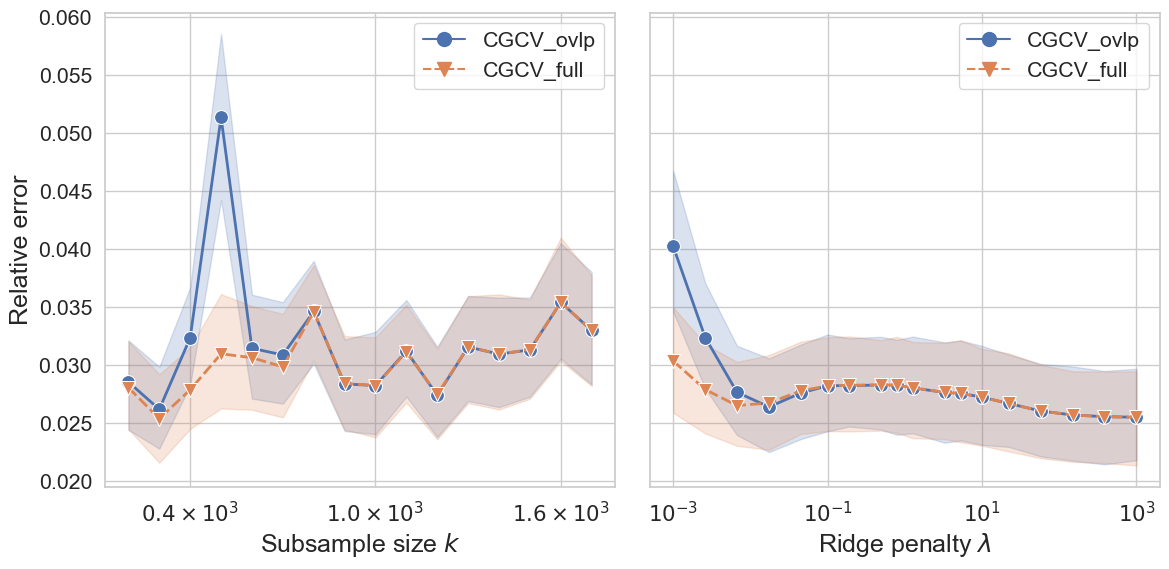

In [25]:
fig, axs = plt.subplots(1,2, figsize=(12, 6), sharey=True)

df = dfs[0]    
i = 0

df1 = df[(df.Type.isin(['CGCV_sub', 'CGCV_full']))
     & (df.M.isin([5]))
     & (df.lam == df.lam[0]) # k is small, less than p
    ]

di = {'CGCV_sub': 'CGCV_ovlp', 'CGCV_full': 'CGCV_full'}
df1 = df1.replace({'Type': di})

g = sns.lineplot(
    data=df1, x='k', y='risk', hue='Type', hue_order=['CGCV_ovlp', 'CGCV_full'],
    style="Type", linewidth=2, #errorbar=None, 
    style_order=['CGCV_ovlp', 'CGCV_full'], 
    markers=['o', 'v'], markersize=10, ax=axs[i]
)
g.legend_.set_title(None)

axs[i].set_xlabel('Subsample size $k$', fontsize=18)
axs[i].set_ylabel("Relative error", fontsize=18)
# axs[i].title.set_text(regs[i].capitalize())
axs[i].set_xticks([])
axs[i].set_xticks([], minor=True)
base = np.array([0.4, 1, 1.6])
ticks = base * 10.**3
axs[i].set_xticks(ticks)
axs[i].set_xticklabels([r'${:.01f}\times10^3$'.format(i) for i in base])

i = 1
df1 = df[(df.Type.isin(['CGCV_sub', 'CGCV_full']))
     & (df.M.isin([10]))
     & (df.k.isin([p])) # k is small, less than p
    ]

di = {'CGCV_sub': 'CGCV_ovlp', 'CGCV_full': 'CGCV_full'}
df1 = df1.replace({'Type': di})

g = sns.lineplot(
    data=df1[df1['lam'].isin(df1['lam'].unique()[::2])], x='lam', y='risk', hue='Type', hue_order=['CGCV_ovlp', 'CGCV_full'],
    style="Type", linewidth=2, #errorbar=None, 
    style_order=['CGCV_ovlp', 'CGCV_full'], 
    markers=['o', 'v'], markersize=10, ax=axs[i]
)
g.legend_.set_title(None)


axs[1].set_xscale("log")
axs[i].set_xlabel('Ridge penalty $\lambda$', fontsize=18)
axs[i].set_ylabel("Relative error", fontsize=18)
# axs[i].title.set_text(regs[0].capitalize())
axs[i].set_xticks([])
axs[i].set_xticks([], minor=True)
exponents = np.array([-3,-1,1,3])
ticks = 10.**exponents
axs[i].set_xticks(ticks)
axs[i].set_xticklabels(['$10^{{{:d}}}$'.format(i) for i in exponents])

axs[1].set(ylabel=None)
for j in range(2):
    for lh in axs[j].get_legend().legendHandles:
        lh.set_markersize(10)

fig.tight_layout()
plt.savefig('CGCV_sub_full_ridge.pdf', bbox_inches='tight', dpi=300)

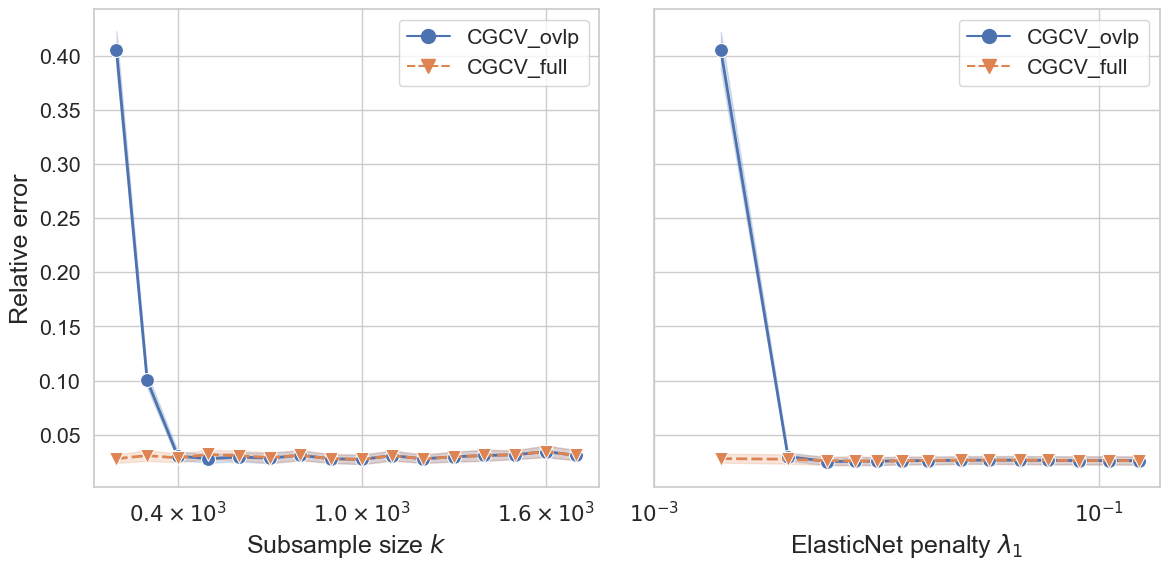

In [26]:
fig, axs = plt.subplots(1,2, figsize=(12, 6), sharey=True)

df = dfs[1]    # elastic net
i = 0

df1 = df[(df.Type.isin(['CGCV_sub', 'CGCV_full']))
     & (df.M.isin([10]))
     & (df.lam == .002) # k is small, less than p
    ]

di = {'CGCV_sub': 'CGCV_ovlp', 'CGCV_full': 'CGCV_full'}
df1 = df1.replace({'Type': di})

g = sns.lineplot(
    data=df1, x='k', y='risk', hue='Type', hue_order=['CGCV_ovlp', 'CGCV_full'],
    style="Type", linewidth=2, #errorbar=None, 
    style_order=['CGCV_ovlp', 'CGCV_full'], 
    markers=['o', 'v'], markersize=10, ax=axs[i]
)
g.legend_.set_title(None)

axs[i].set_xlabel('Subsample size $k$', fontsize=18)
axs[i].set_ylabel("Relative error", fontsize=18)
# axs[i].title.set_text(regs[i].capitalize())
axs[i].set_xticks([])
axs[i].set_xticks([], minor=True)
base = np.array([0.4, 1, 1.6])
ticks = base * 10.**3
axs[i].set_xticks(ticks)
axs[i].set_xticklabels([r'${:.01f}\times10^3$'.format(i) for i in base])

i = 1
df1 = df[(df.Type.isin(['CGCV_sub', 'CGCV_full']))
     & (df.M.isin([10]))
     & (df.k.isin([df.k.min()])) # k is small, less than p
    ]

di = {'CGCV_sub': 'CGCV_ovlp', 'CGCV_full': 'CGCV_full'}
df1 = df1.replace({'Type': di})

g = sns.lineplot(
    data=df1[df1['lam'].isin(df1['lam'].unique()[::2])], x='lam', y='risk', hue='Type', hue_order=['CGCV_ovlp', 'CGCV_full'],
    style="Type", linewidth=2, #errorbar=None, 
    style_order=['CGCV_ovlp', 'CGCV_full'], 
    markers=['o', 'v'], markersize=10, ax=axs[i]
)
g.legend_.set_title(None)


axs[1].set_xscale("log")
axs[i].set_xlabel('ElasticNet penalty $\lambda_1$', fontsize=18)
axs[i].set_ylabel("Relative error", fontsize=18)
# axs[i].title.set_text(regs[0].capitalize())
axs[i].set_xticks([])
axs[i].set_xticks([], minor=True)
exponents = np.array([-3,-1])
ticks = 10.**exponents
axs[i].set_xticks(ticks)
axs[i].set_xticklabels(['$10^{{{:d}}}$'.format(i) for i in exponents])

axs[1].set(ylabel=None)
for j in range(2):
    for lh in axs[j].get_legend().legendHandles:
        lh.set_markersize(10)

fig.tight_layout()
plt.savefig('CGCV_sub_full_ElasticNet.pdf', bbox_inches='tight', dpi=300)

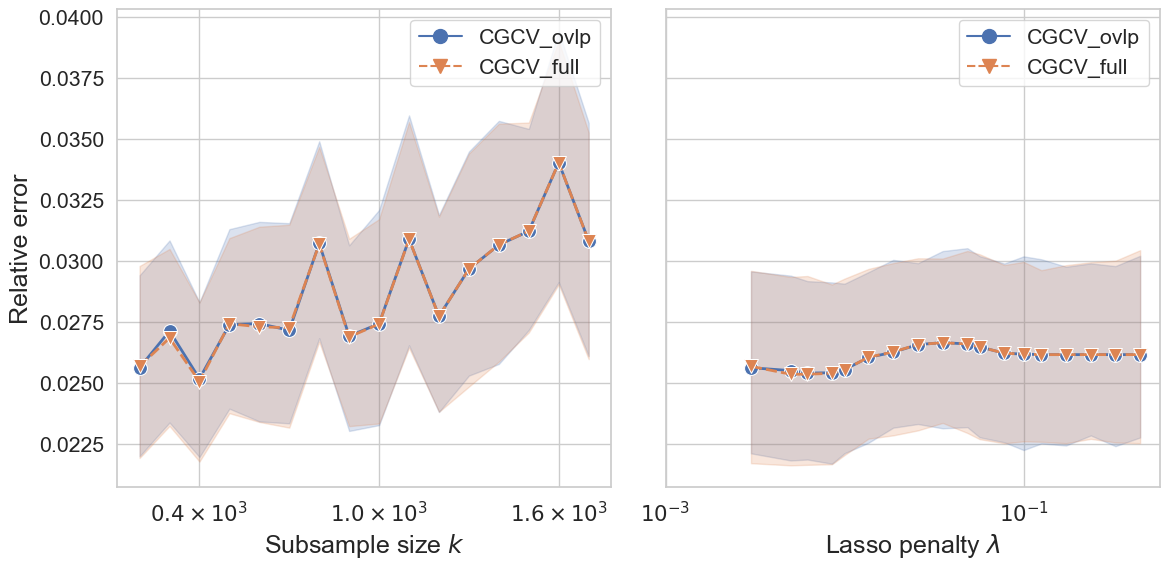

In [27]:
fig, axs = plt.subplots(1,2, figsize=(12, 6), sharey=True)

df = dfs[2]    # lasso
i = 0

df1 = df[(df.Type.isin(['CGCV_sub', 'CGCV_full']))
     & (df.M.isin([10]))
     & (df.lam == .003) # k is small, less than p
    ]

di = {'CGCV_sub': 'CGCV_ovlp', 'CGCV_full': 'CGCV_full'}
df1 = df1.replace({'Type': di})

g = sns.lineplot(
    data=df1, x='k', y='risk', hue='Type', hue_order=['CGCV_ovlp', 'CGCV_full'],
    style="Type", linewidth=2, #errorbar=None, 
    style_order=['CGCV_ovlp', 'CGCV_full'], 
    markers=['o', 'v'], markersize=10, ax=axs[i]
)
g.legend_.set_title(None)

axs[i].set_xlabel('Subsample size $k$', fontsize=18)
axs[i].set_ylabel("Relative error", fontsize=18)
# axs[i].title.set_text(regs[i].capitalize())
axs[i].set_xticks([])
axs[i].set_xticks([], minor=True)
base = np.array([0.4, 1, 1.6])
ticks = base * 10.**3
axs[i].set_xticks(ticks)
axs[i].set_xticklabels([r'${:.01f}\times10^3$'.format(i) for i in base])

i = 1
df1 = df[(df.Type.isin(['CGCV_sub', 'CGCV_full']))
     & (df.M.isin([10]))
     & (df.k.isin([df.k.min()])) # k is small, less than p
    ]
di = {'CGCV_sub': 'CGCV_ovlp', 'CGCV_full': 'CGCV_full'}
df1 = df1.replace({'Type': di})

g = sns.lineplot(
    data=df1[df1['lam'].isin(df1['lam'].unique()[::2])], x='lam', y='risk', hue='Type', hue_order=['CGCV_ovlp', 'CGCV_full'],
    style="Type", linewidth=2, #errorbar=None, 
    style_order=['CGCV_ovlp', 'CGCV_full'], 
    markers=['o', 'v'], markersize=10, ax=axs[i]
)
g.legend_.set_title(None)


axs[1].set_xscale("log")
axs[i].set_xlabel('Lasso penalty $\lambda$', fontsize=18)
axs[i].set_ylabel("Relative error", fontsize=18)
# axs[i].title.set_text(regs[0].capitalize())
axs[i].set_xticks([])
axs[i].set_xticks([], minor=True)
exponents = np.array([-3,-1])
ticks = 10.**exponents
axs[i].set_xticks(ticks)
axs[i].set_xticklabels(['$10^{{{:d}}}$'.format(i) for i in exponents])

axs[1].set(ylabel=None)
for j in range(2):
    for lh in axs[j].get_legend().legendHandles:
        lh.set_markersize(10)

fig.tight_layout()
plt.savefig('CGCV_sub_full_lasso.pdf', bbox_inches='tight', dpi=300)

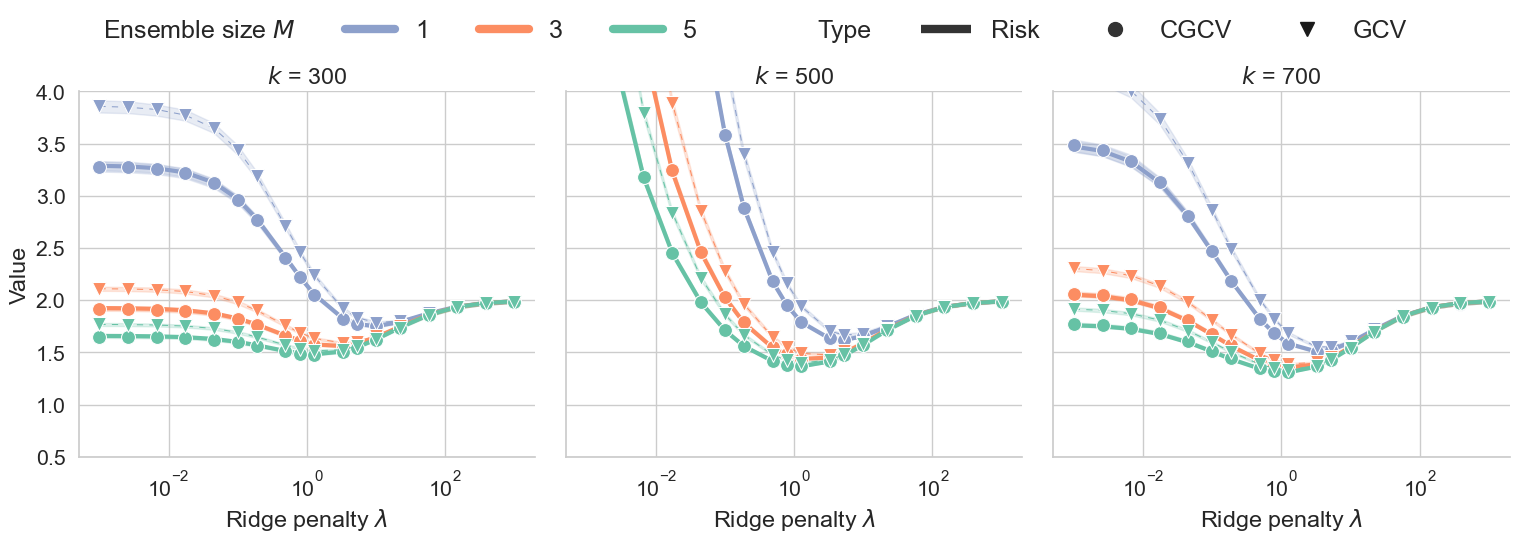

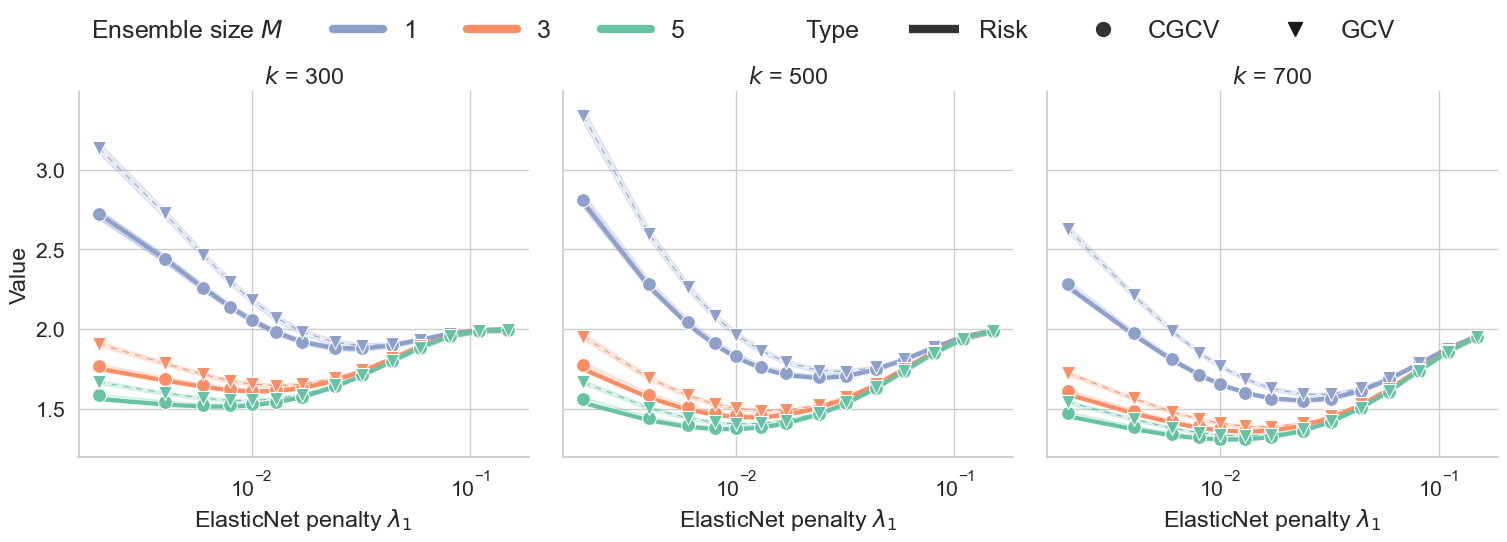

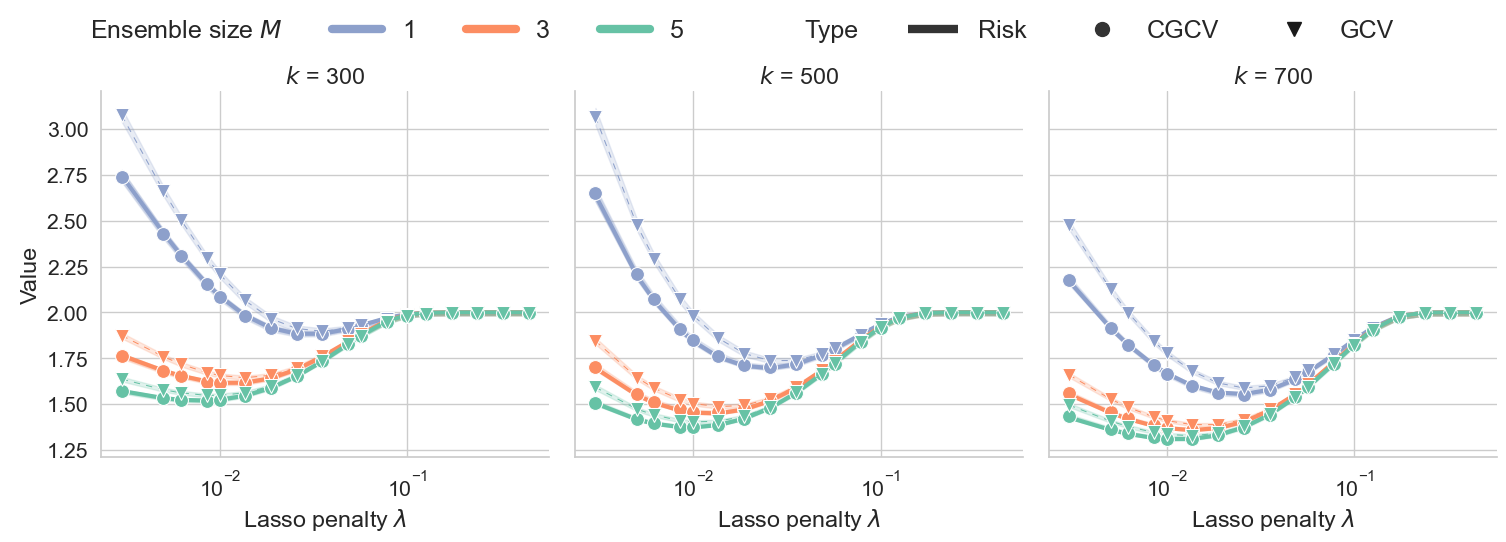

In [28]:
import matplotlib
import matplotlib.lines as mlines
methods = ['Ridge', 'ElasticNet', 'Lasso']
# plot as function of lambda; "V-shape curve"
for i, df in enumerate(dfs):

    method = methods[i]
    df1 = df[(df.Type.isin(['Risk', 'GCV', 'CGCV']))
             & (df.M.isin([1, 3, 5]))
             & (df.k.isin([df.k.min()+100, p, 700]))
            ]
    df1 = df1.rename(columns={'k':'$k$', 'M':'$M$'})
    g = sns.relplot(
        data=df1[df1['lam'].isin(df1['lam'].unique()[::2])], x='lam', y='risk', hue='$M$', style='Type', col='$k$', 
        palette=sns.color_palette("Set2", df1['$M$'].nunique())[::-1], 
        style_order=['Risk','CGCV','GCV'], 
        markers=[',', 'o', 'v'], markersize=10, 
        size='Type', size_order=['Risk','CGCV','GCV'],  dashes=[(1,0),(0,1),(6,6)],
        kind='line', facet_kws={'sharey': True, 'sharex': True}, #errorbar=None, 
    )
    g.set(xscale="log")

    if i==0:
        g.set(ylim=(0.5,4))
    if i!=1:
        g.set_xlabels(method+" penalty $\lambda$", clear_inner=False)
    if i==1:
        g.set_xlabels(method+" penalty $\lambda_1$", clear_inner=False)
    g.set_ylabels("Value", clear_inner=True)

    
    lines_labels = [g.axes[0,0].get_legend_handles_labels()]
    handles, labels = [sum(lol, []) for lol in zip(*lines_labels)]
    _, indices = np.unique(labels, return_index=True)
    labels[0] = 'Ensemble size $M$'
    labels[4:] = ['Type', 'Risk', 'CGCV', 'GCV']
    handles[-1] = mlines.Line2D([], [], color='k', marker='v', linestyle='None',
                              markersize=10)
    
#     sns.move_legend(
#         g, "lower center", 
#         bbox_to_anchor=(.5, .95), ncol=8, title=None, frameon=False, fontsize=15
#     )
    g._legend.remove()
    
    for item in handles[:6]:
        item.set_linewidth(6)
    for item in handles[6:]:
        item.set_markersize(10)
    g.add_legend({i:j for (i,j) in zip(labels,handles)},
                loc="lower center", bbox_to_anchor=(.27, 0.95), 
                 ncol=9, title=None, frameon=False, fontsize=18)
    
    plt.savefig(regs[i] + '_lam.pdf', bbox_inches='tight', dpi=300)


In [29]:
np.r_[1, np.linspace(0,100, 11)[1:]].astype(int)

array([  1,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100])

In [30]:
lam2 = dfs[1].lam.unique()
lams = [[.5, 1], [lam2[0], lam2[3]], [.005, .01]] #  

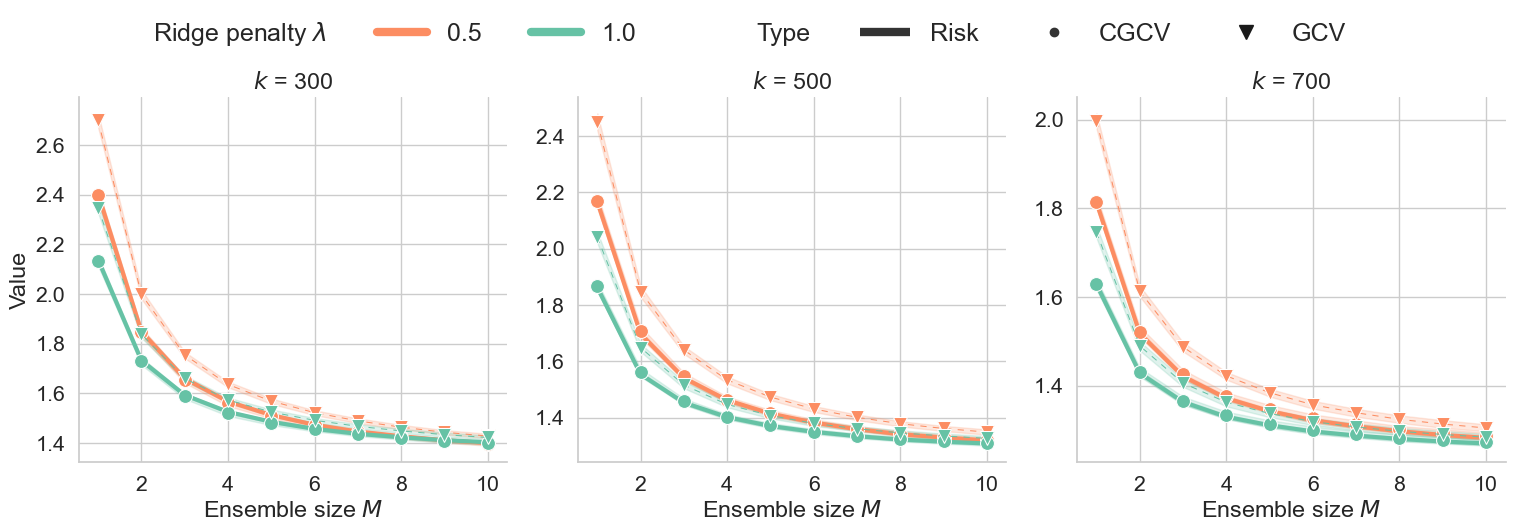

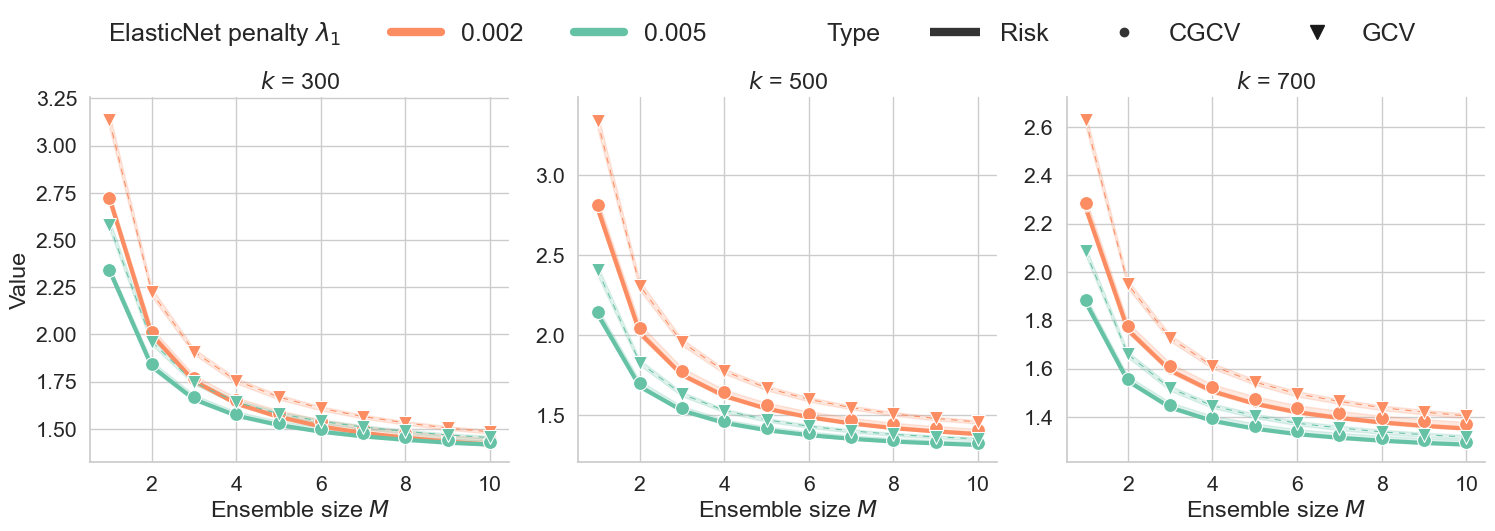

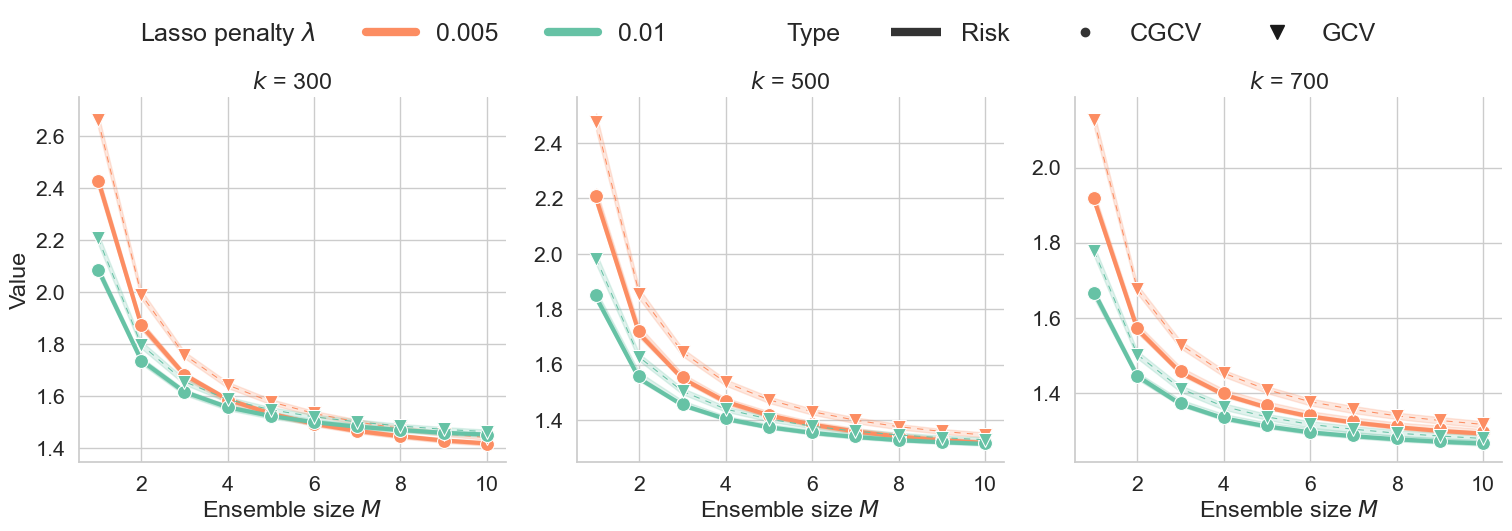

In [31]:
methods = ['Ridge', 'ElasticNet', 'Lasso']
for i, df in enumerate(dfs):
    
    method = methods[i]
    df1 = df[(df.Type.isin(['Risk', 'GCV', 'CGCV']))
             & (df.lam.isin(lams[i]))
             & (df.k.isin([p-200, p, p+200]))
             & (df.M <=10)
            ]
    df1 = df1.rename(columns={'k':'$k$'})
    
    g = sns.relplot(
        data=
        # df1[df1['M'].isin(
        #     np.r_[1, np.linspace(0,100, 21)[1:]].astype(int)
        # )]
        df1, x='M', y='risk', hue='lam', style='Type', col='$k$', 
        palette=sns.color_palette("Set2", df1.lam.nunique())[::-1], 
        style_order=['Risk','CGCV','GCV'], dashes=[(1,0),(0,1),(6,6)],
        markers=['.', 'o', 'v'], markersize=10, 
        size='Type', size_order=['Risk','CGCV','GCV'],
        kind='line', facet_kws={'sharey': False, 'sharex': True}, #errorbar=None, 
    )
    g.set_xlabels("Ensemble size $M$", clear_inner=False)
    g.set_ylabels("Value", clear_inner=True)

#     sns.move_legend(
#         g, "lower center", 
#         bbox_to_anchor=(.5, .95), ncol=8, title=None, frameon=False, fontsize=15
#     )
    lines_labels = [g.axes[0,0].get_legend_handles_labels()]
    handles, labels = [sum(lol, []) for lol in zip(*lines_labels)]
    _, indices = np.unique(labels, return_index=True)
    if i !=1:
        labels[0] = method + ' penalty $\lambda$'
    if i ==1:
        labels[0] = method + ' penalty $\lambda_1$'
    
    labels[3:] = ['Type', 'Risk', 'CGCV', 'GCV']
    handles[-1] = mlines.Line2D([], [], color='k', marker='v', linestyle='None',
                              markersize=10)

    g._legend.remove()
    
    for item in handles[:6]:
        item.set_linewidth(6)
    for item in handles[6:]:
        item.set_markersize(10)
    g.add_legend({i:j for (i,j) in zip(labels,handles)},
                loc="lower center", bbox_to_anchor=(.28, 0.95), 
                 ncol=9, title=None, frameon=False, fontsize=18)

    plt.savefig(regs[i] + '_M.pdf', bbox_inches='tight', dpi=300)

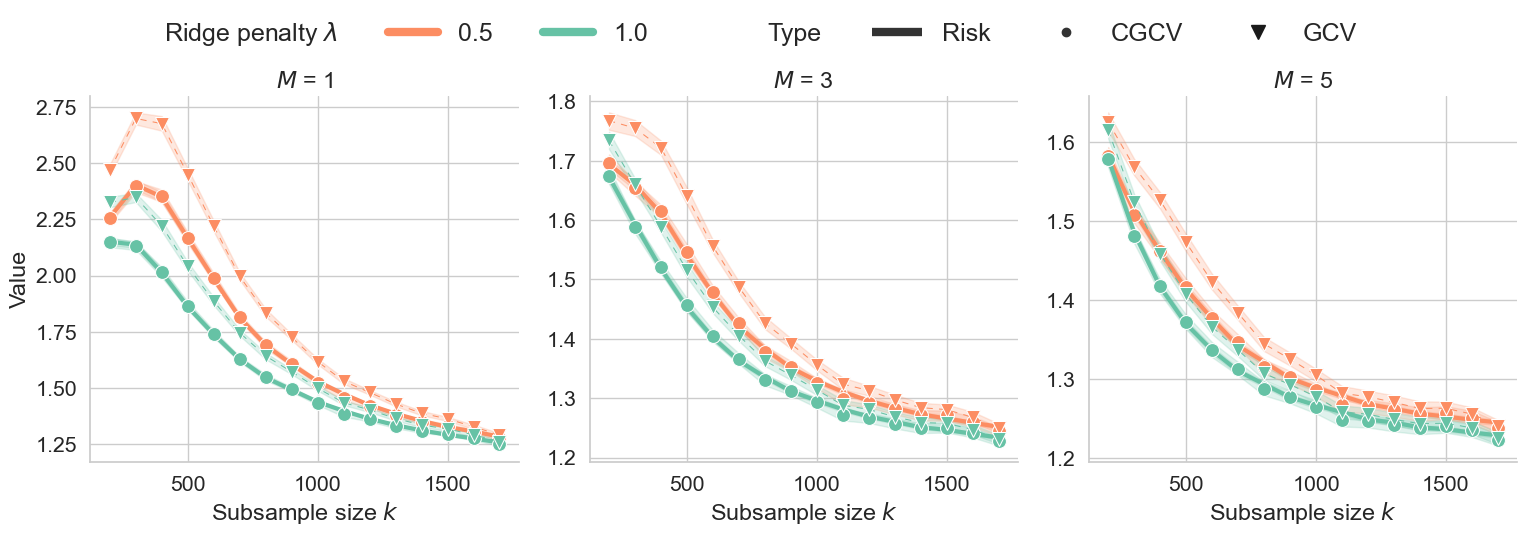

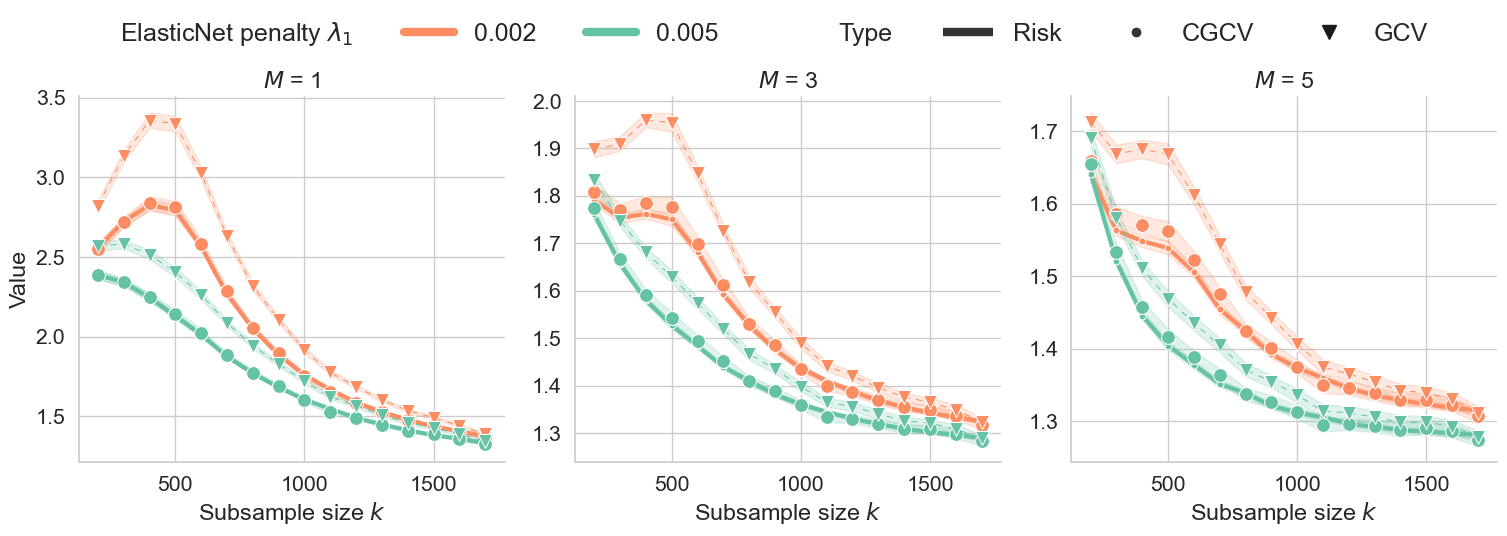

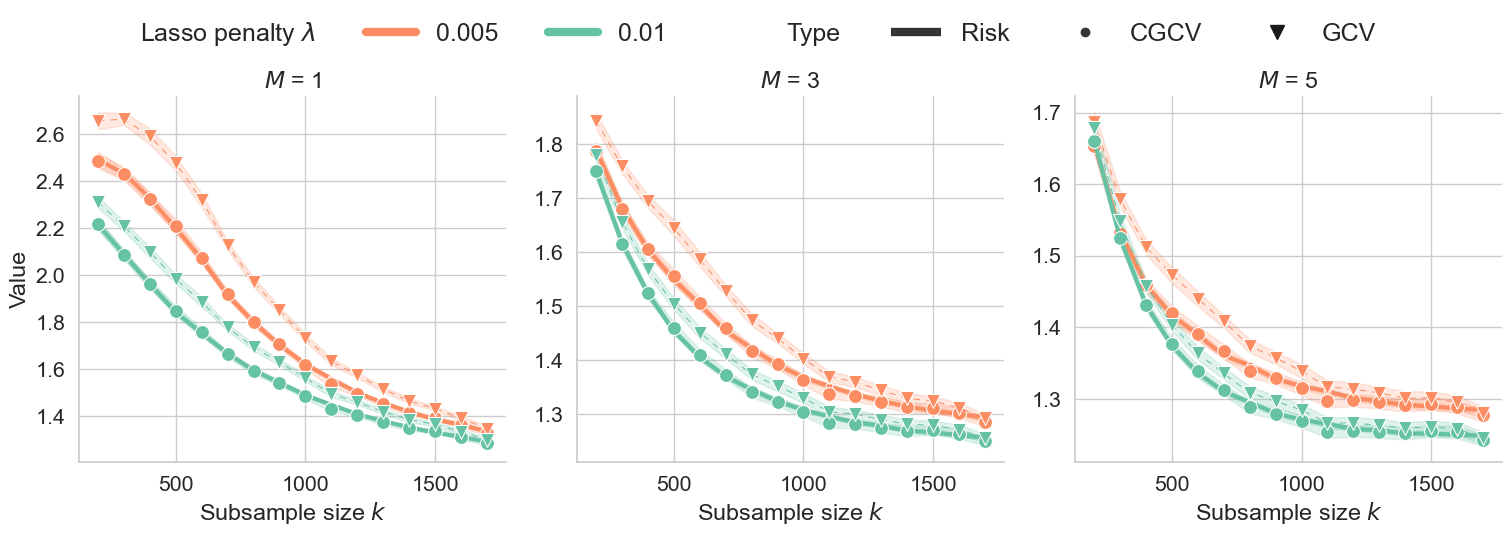

In [32]:
methods = ['Ridge', 'ElasticNet', 'Lasso']

for i, df in enumerate(dfs):
    method = methods[i]
    df1 = df[(df.Type.isin(['Risk', 'GCV', 'CGCV']))
                 & (df.lam.isin(lams[i]))
                 & (df.M.isin([1, 3, 5]))
                ]
    df1 = df1.rename(columns={'M':'$M$'})

        
    g = sns.relplot(
        data=df1, x='k', y='risk', hue='lam', style='Type', col='$M$', 
        palette=sns.color_palette("Set2", df1.lam.nunique())[::-1], 
        style_order=['Risk','CGCV','GCV'], dashes=[(1,0),(0,1),(6,6)],
        markers=['.', 'o', 'v'], markersize=10, 
        size='Type', size_order=['Risk','CGCV','GCV'],
        kind='line', facet_kws={'sharey': False, 'sharex': True},# errorbar=None, 
    )
    g.set_xlabels("Subsample size $k$", clear_inner=False)
    g.set_ylabels("Value", clear_inner=True)
#     sns.move_legend(
#         g, "lower center", 
#         bbox_to_anchor=(.5, .95), ncol=8, title=None, frameon=False, fontsize=15
#     )
    lines_labels = [g.axes[0,0].get_legend_handles_labels()]
    handles, labels = [sum(lol, []) for lol in zip(*lines_labels)]
    _, indices = np.unique(labels, return_index=True)
    if i !=1:
        labels[0] = method + ' penalty $\lambda$'
    if i ==1:
        labels[0] = method + ' penalty $\lambda_1$'

    labels[3:] = ['Type', 'Risk', 'CGCV', 'GCV']
    handles[-1] = mlines.Line2D([], [], color='k', marker='v', linestyle='None',
                              markersize=10)

    g._legend.remove()
    
    for item in handles[:6]:
        item.set_linewidth(6)
    for item in handles[6:]:
        item.set_markersize(10)
    g.add_legend({i:j for (i,j) in zip(labels,handles)},
                loc="lower center", bbox_to_anchor=(.28, 0.95), 
                 ncol=9, title=None, frameon=False, fontsize=18)

    plt.savefig(regs[i] + '_k.pdf', bbox_inches='tight', dpi=300)

['M', '1', '3', '5', 'Type', 'Risk', 'CGCV', 'GCV_naive']


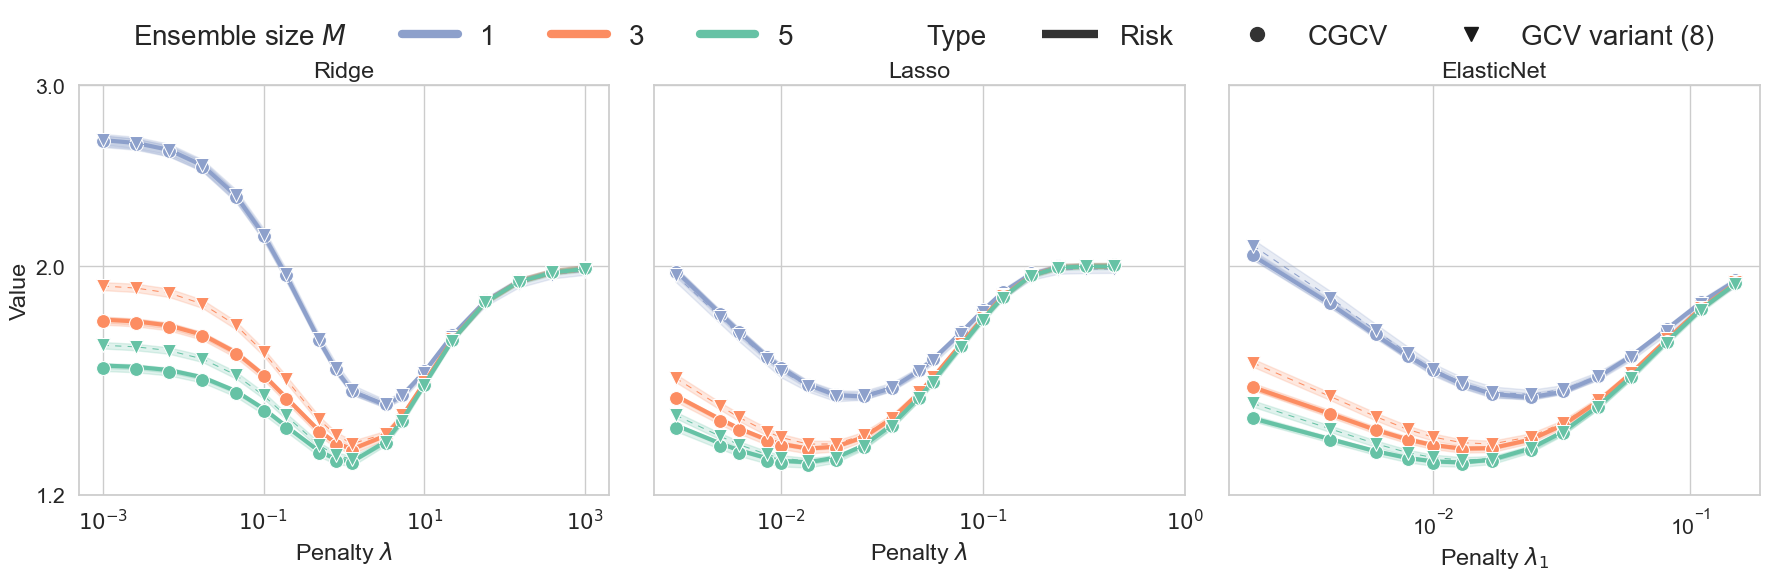

In [33]:
sns.set(font_scale=1.4)
sns.set_style("whitegrid")
fig, axes = plt.subplots(1,3, figsize=(18,6), sharey=True)
cm = sns.color_palette('magma_r', 3)

M_list = np.array([1,3,5], dtype=str)

for j, method in enumerate(['ridge', 'lasso', 'ElasticNet']):
    if j ==0:
        df = dfs[0]
    if j ==1:
        df = dfs[2]
    if j ==2:
        df = dfs[1]
    # df = dfs[j]
    df_emp = df[(df.Type.isin(['Risk', 'GCV_naive', 'CGCV']))
         & (df.M.isin([1,3,5]))
         & (df.k==p+300) # change k to get different plots
        ]
    df_emp['M'] = df_emp['M'].astype(str)

#     axes[j].vlines(phi, y_min-1, y_max+1,
#               linestyles='--', color='gray')
#     axes[j].text(phi*1.1, y_text[j],'Data aspect ratio $\phi={:.01f}$'.format(phi), color='gray', fontsize=16)
    sns.lineplot(
        data=df_emp[(df_emp['lam'].isin(df_emp['lam'].unique()[::2]))], 
        x='lam', y='risk', palette=sns.color_palette("Set2", len(M_list))[::-1], #errorbar=None,
         hue='M', hue_order=M_list, 
        style='Type', style_order=['Risk', 'CGCV', 'GCV_naive', ], dashes=[(1,0),(0,1),(6,6)],
        markers=['.', 'o', 'v'], markersize=10, 
        size='Type', size_order=['Risk', 'CGCV', 'GCV_naive'],
        ax=axes[j], 
    )
    
    
    axes[j].set_xscale('log')
    axes[j].set_yscale('log')
    axes[j].set_title(method)

    axes[j].set_xlabel('Penalty $\lambda$')
    axes[2].set_xlabel('Penalty $\lambda_1$')
    if j==0:
        axes[j].set_ylabel('Value')
    else:
        axes[j].set_ylabel('')

for j in range(2):
    
    axes[j].set_xticks([])
    axes[j].set_xticks([], minor=True)
    exponents = np.array([-3,-1,1,3]) if j==0 else np.arange(-2,1,1)
    ticks = 10.**exponents
    axes[j].set_xticks(ticks)
    axes[j].set_xticklabels(['$10^{{{:d}}}$'.format(i) for i in exponents])
    
j = 0
axes[j].set_yticks([])
axes[j].set_yticks([], minor=True)
ticks = [1.2, 2., 3.]
axes[j].set_yticks(ticks)
axes[j].set_yticklabels(['{:.01f}'.format(i) for i in ticks])

axes[0].set_title('Ridge')
axes[1].set_title('Lasso')

lines_labels = [ax.get_legend_handles_labels() for ax in [axes[0]]]
handles, labels = [sum(lol, []) for lol in zip(*lines_labels)]
_, indices = np.unique(labels, return_index=True)
print(labels)
for j in range(3):
    axes[j].get_legend().remove()
labels[0] = 'Ensemble size $M$'
labels[4:] = ['Type', 'Risk', 'CGCV', 'GCV variant (8)']
import matplotlib
import matplotlib.lines as mlines
handles[-1] = mlines.Line2D([], [], color='k', marker='v', linestyle='None',
                          markersize=10)
legend = fig.legend(handles=handles, labels=labels,
                    loc=9, ncol=10, title='', frameon=False, fontsize=20)

def legend_title_left(leg):
    c = leg.get_children()[0]
    title = c.get_children()[0]
    hpack = c.get_children()[1]
    c._children = [hpack]
    hpack._children = [title] + hpack.get_children()
legend_title_left(legend)

for item, label in zip(legend.legendHandles, legend.texts):
    if label.get_text()=='Risk':
        item.set_linewidth(6)
    elif label.get_text()=='CGCV' or label.get_text()=='GCV':
        item.set_linewidth(2)
        item.set_markersize(10)
    else:
        item.set_linewidth(6)
        
    label.set_ha('left')
fig.tight_layout()
fig.subplots_adjust(top=0.85)
plt.savefig('fig_gcv_naive.pdf', bbox_inches='tight', dpi=300)